<a href="https://colab.research.google.com/github/Lalit767/Expedia_Case_Study/blob/main/GeographyAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-b5879946c48f>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_nights, x="Room Nights (M)", y="Region", ax=axs[0, 0], palette="crest")
<ipython-input-1-b5879946c48f>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bounce_sorted, x="Region", y="Bounce Rate", ax=axs[1, 0], palette="flare")
<ipython-input-1-b5879946c48f>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=efficiency_sorted, x="Region", y="Efficiency (Room Nights per visit)%", ax=axs[1, 1], palette="viridis")


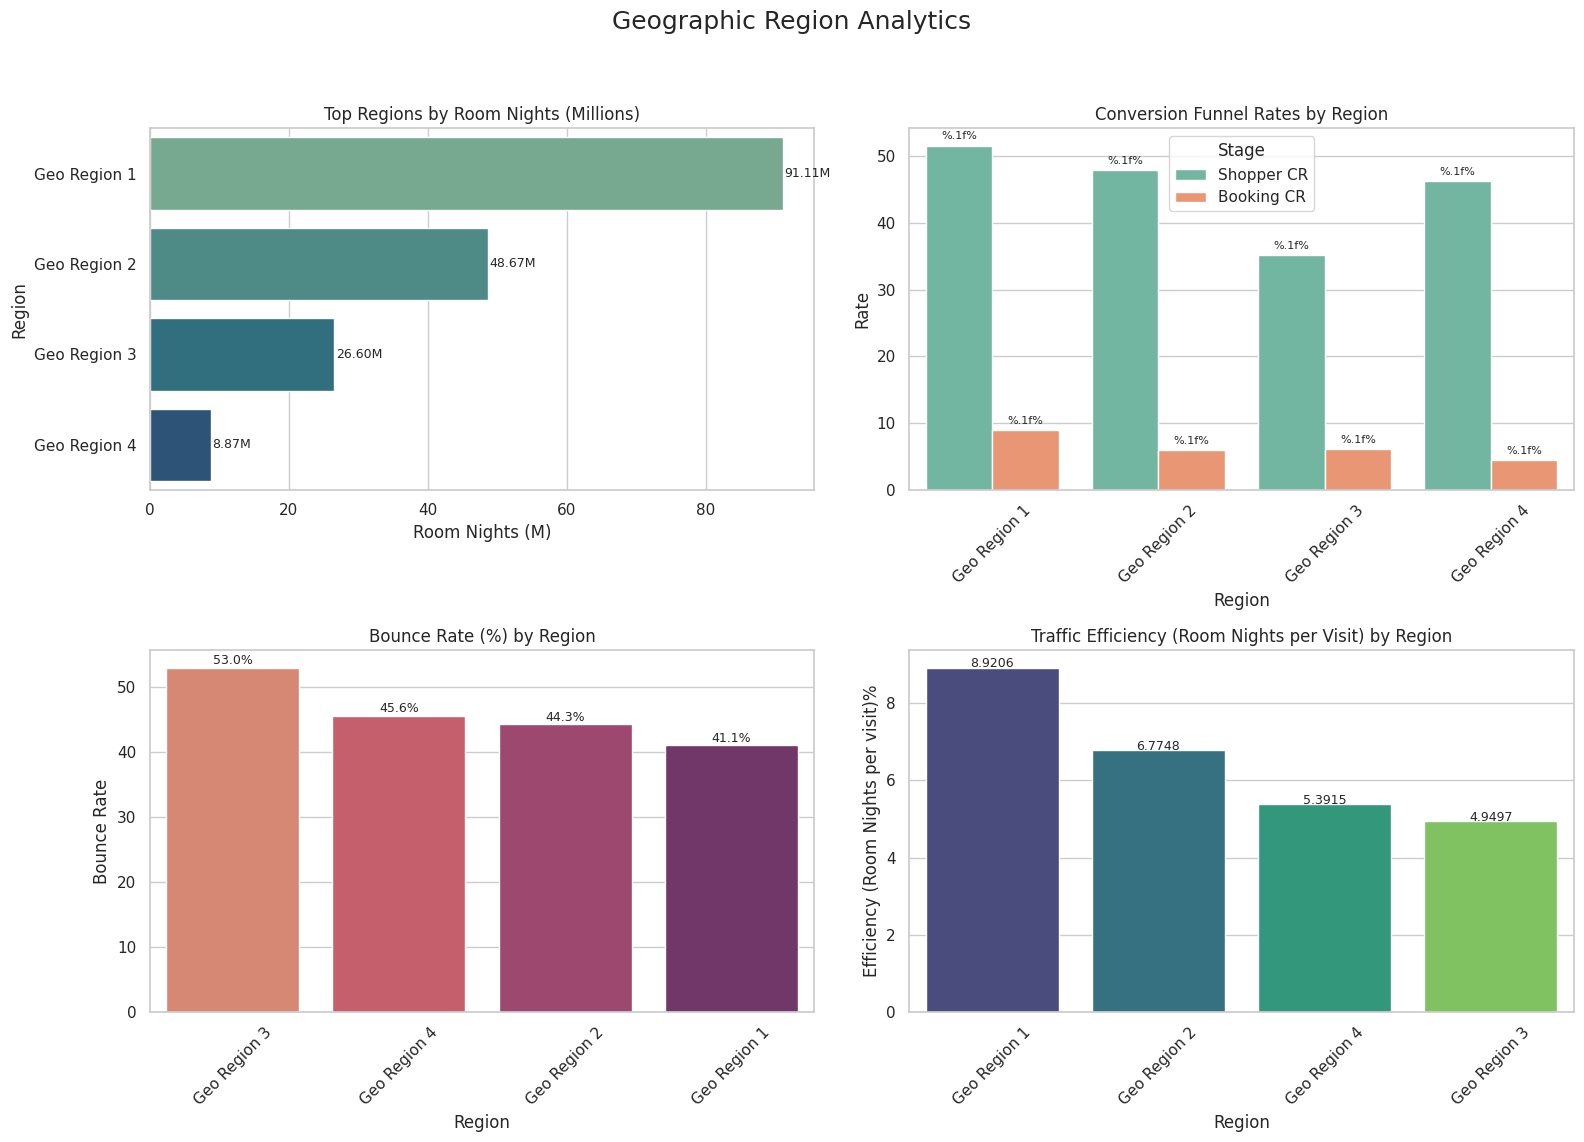


Summary Table by Region:
         Region Traffic  Room Nights (M) Room Nights Volume  Shopper CR  \
0  Geo Region 1    High            91.11            Highest       51.57   
1  Geo Region 2    High            48.67            Highest       47.93   
2  Geo Region 3  Medium            26.60           Moderate       35.19   
3  Geo Region 4     Low             8.87                Low       46.31   

   Booking CR  Bounce Rate  Efficiency (Room Nights per visit)%  
0        8.93        41.09                               8.9206  
1        6.03        44.31                               6.7748  
2        6.07        52.97                               4.9497  
3        4.42        45.59                               5.3915  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/sample_data/HCOM_Analytics_Insights_Case_Study_Dataset.csv")

# ------- Geographic Region Aggregation -------
geo_summary = df.groupby("Geographic Region")[[
    "Visits", "Qualified Shoppers", "Bounced Visits", "Net Orders", "Net Room Nights"
]].sum().reset_index()

# Compute performance metrics
geo_summary["Shopper Conversion Rate (%)"] = (
    geo_summary["Qualified Shoppers"] / geo_summary["Visits"].replace(0, 1) * 100
).round(2)

geo_summary["Booking Conversion Rate (%)"] = (
    geo_summary["Net Orders"] / geo_summary["Qualified Shoppers"].replace(0, 1) * 100
).round(2)

geo_summary["Bounce Rate (%)"] = (
    geo_summary["Bounced Visits"] / geo_summary["Visits"].replace(0, 1) * 100
).round(2)

geo_summary["Traffic Efficiency"] = (
    geo_summary["Net Room Nights"] / geo_summary["Visits"].replace(0, 1) * 100
).round(4)

geo_summary["Traffic"] = pd.qcut(geo_summary["Visits"], q=3, labels=["Low", "Medium", "High"])
geo_summary["Room Nights (M)"] = (geo_summary["Net Room Nights"] / 1e6).round(2)
geo_summary["Room Nights Volume"] = pd.qcut(geo_summary["Net Room Nights"], q=3, labels=["Low", "Moderate", "Highest"])

# Final table for visualization
summary_table = geo_summary[[
    "Geographic Region", "Traffic", "Room Nights (M)", "Room Nights Volume",
    "Shopper Conversion Rate (%)", "Booking Conversion Rate (%)",
    "Bounce Rate (%)", "Traffic Efficiency"
]].rename(columns={
    "Geographic Region": "Region",
    "Shopper Conversion Rate (%)": "Shopper CR",
    "Booking Conversion Rate (%)": "Booking CR",
    "Bounce Rate (%)": "Bounce Rate",
    "Traffic Efficiency": "Efficiency (Room Nights per visit)%"
}).reset_index(drop=True)

# ---------- Visualization ----------
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Geographic Region Analytics", fontsize=18)

# Chart 1: Room Nights Volume
top_nights = summary_table.sort_values(by="Room Nights (M)", ascending=False)
sns.barplot(data=top_nights, x="Room Nights (M)", y="Region", ax=axs[0, 0], palette="crest")
axs[0, 0].set_title("Top Regions by Room Nights (Millions)")
for i, v in enumerate(top_nights["Room Nights (M)"]):
    axs[0, 0].text(v + 0.2, i, f'{v:.2f}M', va='center', fontsize=9)

# Chart 2: Conversion Funnel
conversion_data = summary_table.melt(
    id_vars="Region",
    value_vars=["Shopper CR", "Booking CR"],
    var_name="Stage",
    value_name="Rate"
)
sns.barplot(data=conversion_data, x="Region", y="Rate", hue="Stage", ax=axs[0, 1], palette="Set2")
axs[0, 1].set_title("Conversion Funnel Rates by Region")
axs[0, 1].tick_params(axis='x', rotation=45)
for bar in axs[0, 1].containers:
    axs[0, 1].bar_label(bar, fmt="%.1f%", padding=3, fontsize=8)

# Chart 3: Bounce Rate
bounce_sorted = summary_table.sort_values(by="Bounce Rate", ascending=False)
sns.barplot(data=bounce_sorted, x="Region", y="Bounce Rate", ax=axs[1, 0], palette="flare")
axs[1, 0].set_title("Bounce Rate (%) by Region")
axs[1, 0].tick_params(axis='x', rotation=45)
for i, val in enumerate(bounce_sorted["Bounce Rate"]):
    axs[1, 0].text(i, val + 0.5, f'{val:.1f}%', ha='center', fontsize=9)

# Chart 4: Traffic Efficiency
efficiency_sorted = summary_table.sort_values(by="Efficiency (Room Nights per visit)%", ascending=False)
sns.barplot(data=efficiency_sorted, x="Region", y="Efficiency (Room Nights per visit)%", ax=axs[1, 1], palette="viridis")
axs[1, 1].set_title("Traffic Efficiency (Room Nights per Visit) by Region")
axs[1, 1].tick_params(axis='x', rotation=45)
for i, val in enumerate(efficiency_sorted["Efficiency (Room Nights per visit)%"]):
    axs[1, 1].text(i, val + 0.002, f'{val:.4f}', ha='center', fontsize=9)

# Final layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Geographic_Region_Analytics.png")  # Optional: Save image
plt.show()

# Optional: Print summary table
print("\nSummary Table by Region:")
print(summary_table)
